In [3]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

os.makedirs("models", exist_ok=True)

print("Библиотеки загружены.")


Библиотеки загружены.


In [4]:
import os
import pandas as pd

# Абсолютный путь к файлу
file_path = r"C:\xampp\htdocs\news_aggregator_ai\data\news_dataset.csv"

# Проверка существования
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}")

# Загрузка
df = pd.read_csv(file_path)

print("Файл успешно загружен!")
print("Размер датасета:", df.shape)
print("\nКатегории:")
print(df["category"].unique())

df.head()

Файл успешно загружен!
Размер датасета: (4503, 2)

Категории:
['Экономика' 'Спорт' 'Из жизни' 'Интернет и СМИ' 'Культура' 'Дом'
 'Бывший СССР' '69-я параллель' 'Мир' 'Наука и техника' 'Путешествия'
 'Россия' 'Нацпроекты' 'Силовые структуры' 'Ценности']


,text,category
0,Синий богатырь В 1930-е годы Советский Союз ох...,Экономика
1,Загитова согласилась вести «Ледниковый период»...,Спорт
2,Объяснена опасность однообразного питания Росс...,Из жизни
3,«Предохраняться? А зачем?» В 2019 году телекан...,Интернет и СМИ
4,Ефремов систематически употреблял наркотики Ак...,Культура


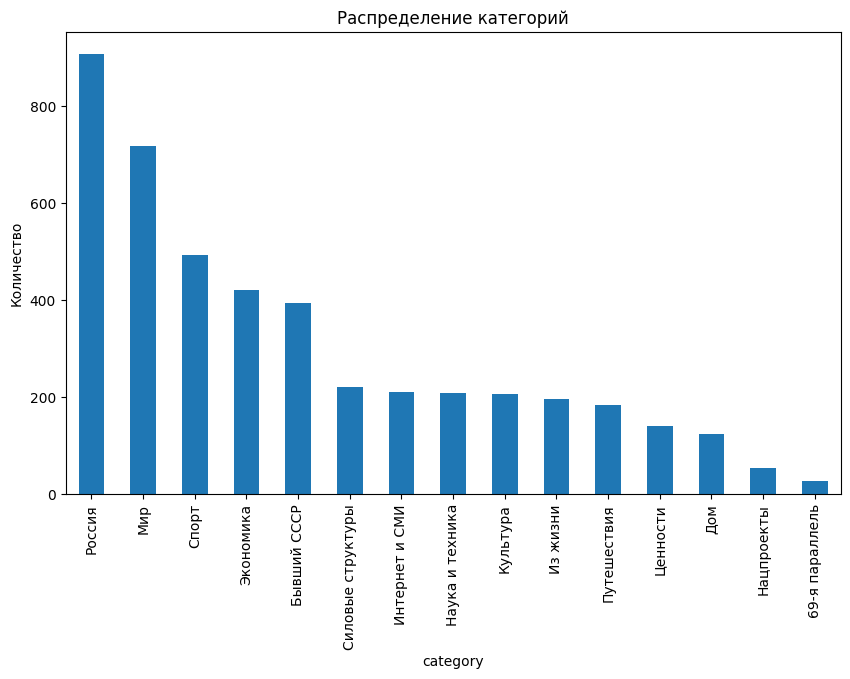

In [5]:
plt.figure(figsize=(10,6))
df["category"].value_counts().plot(kind="bar")
plt.title("Распределение категорий")
plt.ylabel("Количество")
plt.show()

In [6]:
X = df["text"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (3602,)
Test: (901,)


In [7]:
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=3
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Размер обучающей матрицы:", X_train_vec.shape)


Размер обучающей матрицы: (3602, 10000)


In [8]:
models = {
    "LinearSVC": LinearSVC(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "MultinomialNB": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

results

LinearSVC Accuracy: 0.8235
LogisticRegression Accuracy: 0.7603
MultinomialNB Accuracy: 0.5927


{'LinearSVC': 0.8235294117647058,
 'LogisticRegression': 0.7602663706992231,
 'MultinomialNB': 0.5926748057713651}

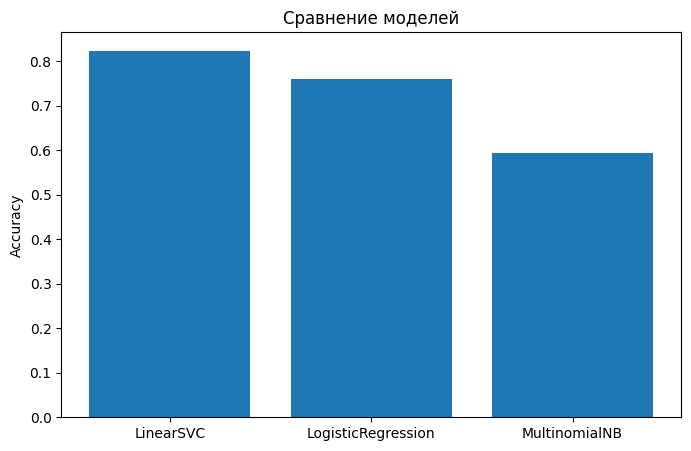

In [9]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.title("Сравнение моделей")
plt.ylabel("Accuracy")
plt.show()

In [10]:
best_model_name = max(results, key=results.get)
print("Лучшая модель:", best_model_name)

best_model = models[best_model_name]


Лучшая модель: LinearSVC


In [11]:
y_pred = best_model.predict(X_test_vec)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

                   precision    recall  f1-score   support

   69-я параллель       1.00      0.40      0.57         5
      Бывший СССР       0.81      0.84      0.82        79
              Дом       0.85      0.44      0.58        25
         Из жизни       0.78      0.82      0.80        39
   Интернет и СМИ       0.83      0.57      0.68        42
         Культура       0.82      0.78      0.80        41
              Мир       0.77      0.83      0.80       144
  Наука и техника       0.82      0.76      0.79        42
       Нацпроекты       1.00      1.00      1.00        10
      Путешествия       0.86      0.81      0.83        37
           Россия       0.76      0.84      0.80       182
Силовые структуры       0.75      0.75      0.75        44
            Спорт       0.95      0.97      0.96        99
         Ценности       0.92      0.86      0.89        28
        Экономика       0.92      0.92      0.92        84

         accuracy             

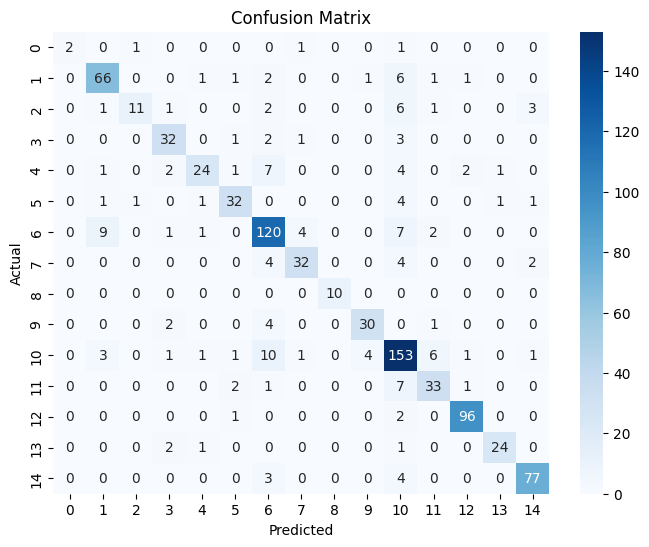

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
joblib.dump(best_model, "models/model2.pkl")
joblib.dump(vectorizer, "models/vectorizer2.pkl")

print("Модель сохранена.")


Модель сохранена.


In [14]:
metrics_df = pd.DataFrame({
    "model": results.keys(),
    "accuracy": results.values()
})

metrics_df.to_csv("models/metrics_history.csv", index=False)

metrics_df


,model,accuracy
0,LinearSVC,0.823529
1,LogisticRegression,0.760266
2,MultinomialNB,0.592675
